In [1]:
#Predicciones dataset de flores
#Impportamos las librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# 1. Creación del DataFrame
df = pd.read_csv('IRIS.csv')
print("Primeras filas del DataFrame:")
print(df.head())

Primeras filas del DataFrame:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [3]:
#Operaciones con el dataset
#ver si hay datos nulos
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [4]:
# Filtrar solo las clases setosa y versicolor
df = df[df['species'].isin(['Iris-setosa', 'Iris-versicolor'])]

In [5]:
# Seleccionar solo las columnas necesarias y convertir especies a valores binarios
df = df[['sepal_length', 'petal_length', 'species']]
df['species'] = df['species'].map({'Iris-setosa': 1, 'Iris-versicolor': -1})

In [6]:
# Renombrar columnas para mayor claridad
df.columns = ['sepal_length', 'petal_length', 'species']

In [7]:

print("\nDataFrame después de las operaciones:")
print(df.head())


DataFrame después de las operaciones:
   sepal_length  petal_length  species
0           5.1           1.4        1
1           4.9           1.4        1
2           4.7           1.3        1
3           4.6           1.5        1
4           5.0           1.4        1


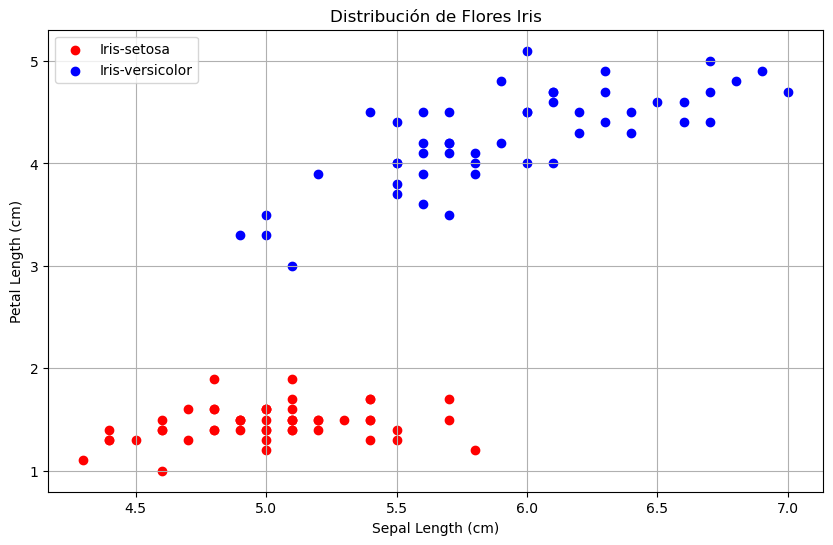

In [8]:
# 3. Gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df[df['species'] == 1]['sepal_length'], 
            df[df['species'] == 1]['petal_length'], 
            color='red', label='Iris-setosa')
plt.scatter(df[df['species'] == -1]['sepal_length'], 
            df[df['species'] == -1]['petal_length'], 
            color='blue', label='Iris-versicolor')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Distribución de Flores Iris')
plt.legend()
plt.grid(True)
plt.show()

Época 1: Errores = 46, Precisión entrenamiento = 0.47, Precisión validación = 0.95

Convergencia alcanzada en 4 épocas

Classification Report:
              precision    recall  f1-score   support

    Clase -1       0.89      1.00      0.94         8
     Clase 1       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20


Matriz de Confusión:


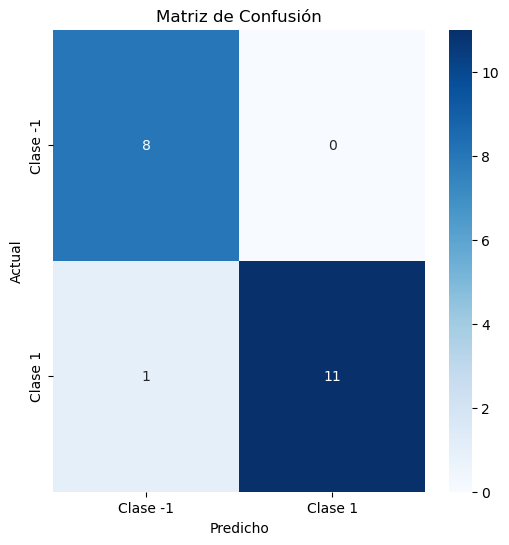


Precisión final: 0.95


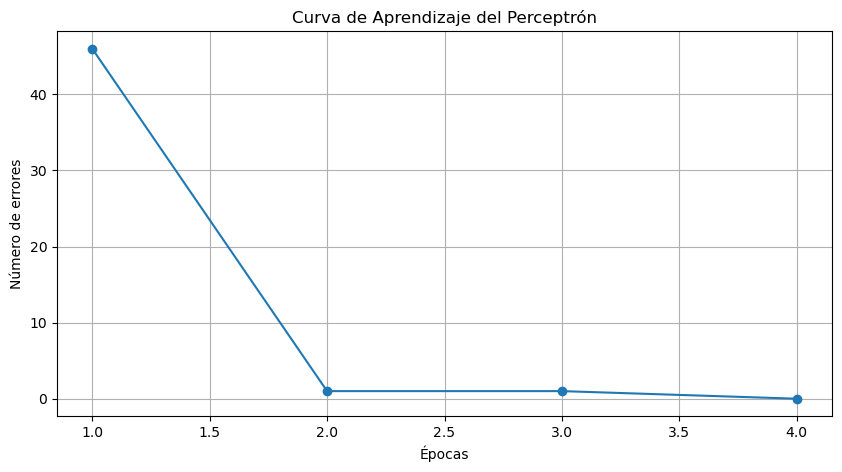

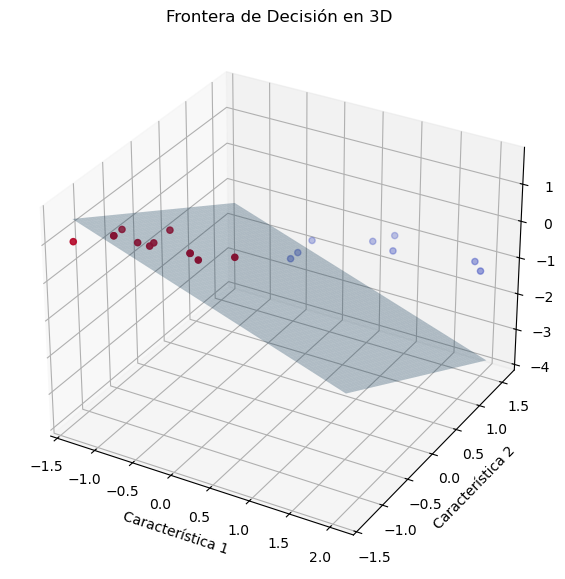

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

class EnhancedPerceptron:
    def __init__(self, learning_rate=0.01, epochs=100, random_state=None, verbose=False, tolerance=1e-4):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.random_state = random_state
        self.verbose = verbose
        self.tolerance = tolerance
        self.weights = None
        self.bias = None
        self.errors = []
        self.scaler = StandardScaler()

    def initialize_parameters(self, n_features):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        self.weights = np.random.randn(n_features) * 0.01
        self.bias = np.random.randn() * 0.01

    def fit(self, X, y, validation_data=None):
        X_scaled = self.scaler.fit_transform(X)
        y = np.where(y > 0, 1, -1)
        n_samples, n_features = X_scaled.shape
        self.initialize_parameters(n_features)

        for epoch in range(self.epochs):
            net_input = np.dot(X_scaled, self.weights) + self.bias
            predictions = np.where(net_input >= 0, 1, -1)
            errors = y - predictions

            self.weights += self.learning_rate * np.dot(errors, X_scaled) / n_samples
            self.bias += self.learning_rate * errors.mean()

            error_count = np.sum(errors != 0)
            self.errors.append(error_count)

            if np.linalg.norm(self.learning_rate * np.dot(errors, X_scaled)) < self.tolerance:
                if self.verbose:
                    print(f"\nConvergencia alcanzada en {epoch+1} épocas")
                break

            if self.verbose and (epoch % 10 == 0 or epoch == self.epochs-1):
                train_acc = self.score(X_scaled, y)
                msg = f"Época {epoch+1}: Errores = {error_count}, Precisión entrenamiento = {train_acc:.2f}"
                if validation_data:
                    val_acc = self.score(*validation_data)
                    msg += f", Precisión validación = {val_acc:.2f}"
                print(msg)

    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        net_input = np.dot(X_scaled, self.weights) + self.bias
        return np.where(net_input >= 0, 1, -1)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == np.where(y > 0, 1, -1))

    def plot_learning_curve(self):
        plt.figure(figsize=(10, 5))
        plt.plot(range(1, len(self.errors) + 1), self.errors, marker='o')
        plt.xlabel('Épocas')
        plt.ylabel('Número de errores')
        plt.title('Curva de Aprendizaje del Perceptrón')
        plt.grid(True)
        plt.show()

    def evaluate(self, X, y):
        y_pred = self.predict(X)
        y = np.where(y > 0, 1, -1)

        print("\nClassification Report:")
        print(classification_report(y, y_pred, target_names=['Clase -1', 'Clase 1']))

        print("\nMatriz de Confusión:")
        cm = confusion_matrix(y, y_pred)
        plt.figure(figsize=(6,6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase -1', 'Clase 1'], yticklabels=['Clase -1', 'Clase 1'])
        plt.ylabel('Actual')
        plt.xlabel('Predicho')
        plt.title('Matriz de Confusión')
        plt.show()

    def plot_decision_boundary_3D(self, X, y):
        X_scaled = self.scaler.transform(X)
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')

        # Graficar los puntos de datos
        ax.scatter(X_scaled[:, 0], X_scaled[:, 1], y, c=y, cmap='coolwarm', marker='o')

        # Crear una malla de puntos para la superficie de decisión
        x_range = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 50)
        y_range = np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 50)
        xx, yy = np.meshgrid(x_range, y_range)
        zz = -(self.weights[0] * xx + self.weights[1] * yy + self.bias) / self.weights[1]

        ax.plot_surface(xx, yy, zz, alpha=0.3)

        ax.set_xlabel('Característica 1')
        ax.set_ylabel('Característica 2')
        ax.set_zlabel('Clase')
        ax.set_title('Frontera de Decisión en 3D')
        plt.show()

# --- Ejemplo de uso ---
if __name__ == "__main__":
    # Cargar y preparar datos
    df = pd.read_csv('IRIS.csv')
    df = df[df['species'].isin(['Iris-setosa', 'Iris-versicolor'])]
    df['species'] = df['species'].map({'Iris-setosa': 1, 'Iris-versicolor': -1})

    X = df[['sepal_length', 'petal_length']].values
    y = df['species'].values

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar modelo
    perceptron = EnhancedPerceptron(learning_rate=0.1, epochs=50, random_state=42, verbose=True)
    perceptron.fit(X_train, y_train, validation_data=(X_test, y_test))

    # Evaluar modelo
    perceptron.evaluate(X_test, y_test)
    print(f"\nPrecisión final: {perceptron.score(X_test, y_test):.2f}")

    # Visualizar curva de aprendizaje
    perceptron.plot_learning_curve()

    # Visualizar frontera de decisión en 3D
    perceptron.plot_decision_boundary_3D(X_test, y_test)
